<h1>Mnist 多层感知器版更换初始化<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入工具包" data-toc-modified-id="导入工具包-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入工具包</a></span></li><li><span><a href="#导入数据" data-toc-modified-id="导入数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#四层隐层" data-toc-modified-id="四层隐层-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>四层隐层</a></span></li><li><span><a href="#三层" data-toc-modified-id="三层-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>三层</a></span></li><li><span><a href="#二层" data-toc-modified-id="二层-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>二层</a></span></li><li><span><a href="#结论" data-toc-modified-id="结论-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>结论</a></span></li></ul></div>

## 导入工具包

In [24]:
"""A very simple MNIST classifier.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners
"""
#from __future__ import absolute_import
#from __future__ import division
#from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

FLAGS = None


## 导入数据

In [2]:
# Import data
data_dir = 'E:/AI/00/data/Mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Extracting E:/AI/00/data/Mnist/input_data\train-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\train-labels-idx1-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-labels-idx1-ubyte.gz


## 四层隐层

In [25]:
# 初始化模型参数
x  = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.random_normal([784,200],mean=0,stddev=0.1,seed=66))
b1 = tf.Variable(tf.zeros([200]))
W2 = tf.Variable(tf.truncated_normal([200,200],mean=0,stddev=0.1,seed=66))
b2 = tf.Variable(tf.zeros([200]))
W3 = tf.Variable(tf.truncated_normal([200,200],mean=0,stddev=0.1,seed=66))
b3 = tf.Variable(tf.zeros([200]))
W4 = tf.Variable(tf.truncated_normal([200,200],mean=0,stddev=0.1,seed=2))
b4 = tf.Variable(tf.zeros([200]))
W5 = tf.Variable(tf.zeros([200,10]))
b5 = tf.Variable(tf.zeros([10]))

In [26]:
# 添加隐层
hidden1 = tf.nn.tanh(tf.matmul(x,W1)+b1)
hidden2 = tf.nn.relu(tf.matmul(hidden1,W2)+b2)
hidden3 = tf.nn.relu6(tf.matmul(hidden2,W3)+b3)
hidden4 = tf.nn.relu(tf.matmul(hidden3,W4)+b4)
y = tf.matmul(hidden4, W5) + b5
y_ = tf.placeholder(tf.float32, [None, 10])

In [35]:
acc4=dict()
for i in [0.4,0.5,0.6]:
    cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))\
    #    +tf.contrib.layers.l1_regularizer(0.005)(W5)
    train_step = tf.train.GradientDescentOptimizer(i).minimize(cross_entropy)
    sess = tf.Session()
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    acc=[]
    for _ in range(20000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        if _ %300==0:
            acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                        y_: mnist.test.labels}))
    acc4[i]=acc

In [40]:
i=[x for x in range(20000) if x%300==0]
acc4=pd.DataFrame(data=acc4,index=i)
acc4.drop([0,300,600,900],inplace=True)

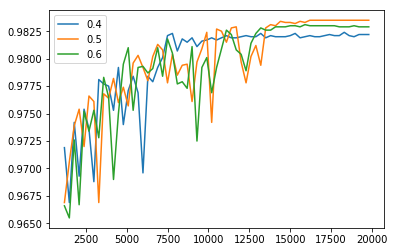

In [62]:
plt.plot(acc4[0.4])
plt.plot(acc4[0.5])
plt.plot(acc4[0.6])
plt.legend()
plt.show()

In [85]:
acc4.loc[15000:].T

,15000,15300,15600,15900,16200,16500,16800,17100,17400,17700,18000,18300,18600,18900,19200,19500,19800
0.4,0.9821,0.9823,0.9819,0.9820,0.9821,0.9820,0.9820,0.9821,0.9822,0.9821,0.9821,0.9824,0.9821,0.9820,0.9822,0.9822,0.9822
0.5,0.9833,0.9832,0.9834,0.9833,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835
0.6,0.9830,0.9830,0.9829,0.9831,0.9830,0.9830,0.9830,0.9830,0.9830,0.9830,0.9829,0.9829,0.9829,0.9830,0.9829,0.9829,0.9829


## 三层

In [64]:
# 初始化模型参数
x  = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.random_normal([784,200],mean=0,stddev=0.1,seed=66))
b1 = tf.Variable(tf.zeros([200]))
W2 = tf.Variable(tf.truncated_normal([200,200],mean=0,stddev=0.1,seed=66))
b2 = tf.Variable(tf.zeros([200]))
W3 = tf.Variable(tf.truncated_normal([200,200],mean=0,stddev=0.1,seed=66))
b3 = tf.Variable(tf.zeros([200]))
#W4 = tf.Variable(tf.truncated_normal([200,200],mean=0,stddev=0.1,seed=2))
#b4 = tf.Variable(tf.zeros([200]))
W5 = tf.Variable(tf.zeros([200,10]))
b5 = tf.Variable(tf.zeros([10]))

In [65]:
# 添加隐层
hidden1 = tf.nn.tanh(tf.matmul(x,W1)+b1)
hidden2 = tf.nn.relu(tf.matmul(hidden1,W2)+b2)
hidden3 = tf.nn.relu6(tf.matmul(hidden2,W3)+b3)
y = tf.matmul(hidden3, W5) + b5
#hidden4 = tf.nn.relu(tf.matmul(hidden3,W4)+b4)
#y = tf.matmul(hidden4, W5) + b5
y_ = tf.placeholder(tf.float32, [None, 10])

In [66]:
acc3=dict()
for i in [0.4,0.5,0.6]:
    cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))\
    #    +tf.contrib.layers.l1_regularizer(0.005)(W5)
    train_step = tf.train.GradientDescentOptimizer(i).minimize(cross_entropy)
    sess = tf.Session()
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    acc=[]
    for _ in range(20000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        if _ %300==0:
            acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                        y_: mnist.test.labels}))
    acc3[i]=acc

In [69]:
i=[x for x in range(20000) if x%300==0]
acc3=pd.DataFrame(data=acc3,index=i)
acc3.drop([0,300,600,900],inplace=True)

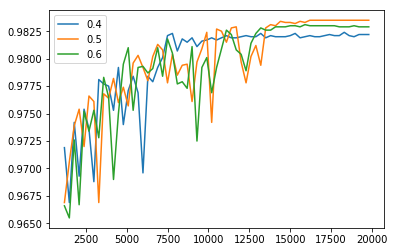

In [70]:
plt.plot(acc3[0.4])
plt.plot(acc3[0.5])
plt.plot(acc3[0.6])
plt.legend()
plt.show()

In [82]:
acc3.loc[15000:].T

,15000,15300,15600,15900,16200,16500,16800,17100,17400,17700,18000,18300,18600,18900,19200,19500,19800
0.4,0.9821,0.9823,0.9819,0.9820,0.9821,0.9820,0.9820,0.9821,0.9822,0.9821,0.9821,0.9824,0.9821,0.9820,0.9822,0.9822,0.9822
0.5,0.9833,0.9832,0.9834,0.9833,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835,0.9835
0.6,0.9830,0.9830,0.9829,0.9831,0.9830,0.9830,0.9830,0.9830,0.9830,0.9830,0.9829,0.9829,0.9829,0.9830,0.9829,0.9829,0.9829


## 二层

In [72]:
# 初始化模型参数
x  = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.random_normal([784,200],mean=0,stddev=0.1,seed=66))
b1 = tf.Variable(tf.zeros([200]))
W2 = tf.Variable(tf.truncated_normal([200,200],mean=0,stddev=0.1,seed=66))
b2 = tf.Variable(tf.zeros([200]))
#W3 = tf.Variable(tf.truncated_normal([200,200],mean=0,stddev=0.1,seed=66))
#b3 = tf.Variable(tf.zeros([200]))
#W4 = tf.Variable(tf.truncated_normal([200,200],mean=0,stddev=0.1,seed=2))
#b4 = tf.Variable(tf.zeros([200]))
W5 = tf.Variable(tf.zeros([200,10]))
b5 = tf.Variable(tf.zeros([10]))

In [73]:
# 添加隐层
hidden1 = tf.nn.tanh(tf.matmul(x,W1)+b1)
hidden2 = tf.nn.relu(tf.matmul(hidden1,W2)+b2)
#hidden3 = tf.nn.relu6(tf.matmul(hidden2,W3)+b3)
#hidden4 = tf.nn.relu(tf.matmul(hidden3,W4)+b4)
#y = tf.matmul(hidden4, W5) + b5
y = tf.matmul(hidden2, W5) + b5
y_ = tf.placeholder(tf.float32, [None, 10])

In [74]:
acc2=dict()
for i in [0.4,0.5,0.6]:
    cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))\
    #    +tf.contrib.layers.l1_regularizer(0.005)(W5)
    train_step = tf.train.GradientDescentOptimizer(i).minimize(cross_entropy)
    sess = tf.Session()
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    acc=[]
    for _ in range(20000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        if _ %300==0:
            acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                        y_: mnist.test.labels}))
    acc2[i]=acc

In [75]:
i=[x for x in range(20000) if x%300==0]
acc2=pd.DataFrame(data=acc2,index=i)
acc2.drop([0,300,600,900],inplace=True)

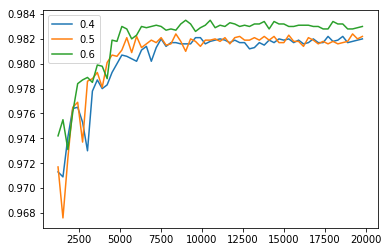

In [76]:
plt.plot(acc2[0.4])
plt.plot(acc2[0.5])
plt.plot(acc2[0.6])
plt.legend()
plt.show()

In [84]:
acc2.loc[15000:].T

,15000,15300,15600,15900,16200,16500,16800,17100,17400,17700,18000,18300,18600,18900,19200,19500,19800
0.4,0.9819,0.9820,0.9817,0.9819,0.9816,0.9817,0.9820,0.9817,0.9817,0.9822,0.9818,0.9819,0.9822,0.9817,0.9818,0.9819,0.9820
0.5,0.9817,0.9823,0.9818,0.9818,0.9814,0.9821,0.9819,0.9816,0.9818,0.9816,0.9818,0.9816,0.9817,0.9818,0.9824,0.9820,0.9822
0.6,0.9832,0.9830,0.9830,0.9831,0.9831,0.9831,0.9830,0.9830,0.9828,0.9828,0.9834,0.9832,0.9832,0.9828,0.9828,0.9829,0.9830


毫无疑问，这个模型是一个非常简陋，性能也不理想的模型。目前只能达到92%左右的准确率。
接下来，希望大家利用现有的知识，将这个模型优化至98%以上的准确率。
Hint：
- 多隐层
- 激活函数
- 正则化
- 初始化`多层隐层改变初始化后97%`
- 摸索一下各个超参数
  - 隐层神经元数量
  - 学习率
  - 正则化惩罚因子
  - 最好每隔几个step就对loss、accuracy等等进行一次输出，这样才能有根据地进行调整

## 结论

当学习率增大时, 循环次数一定要跟着增大

加入正则之后,学习率增大,循环次数不用太大了